In [1]:
#Démarré collaboratory
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Aller au bon répértoire
%cd gdrive/My\ Drive/Gym_trainer/openpose

/content/gdrive/My Drive/Gym_trainer/openpose


In [0]:
#Code pour Mme Achard # à ne pas exécuter #
import numpy as np
import os
import csv

PATH = './output/'
PATH2 = './csv/'
X_train = []
Y_train = []
Personnes = []
files = os.listdir(PATH)
files.sort()
for f in files:
  path = PATH2+f[0:3]+'.csv'
  temp = np.load(PATH+f)
  X_train.append(temp)
  Personnes.append(int(f[1:3]))
print(Personnes)
np.save('Personnes.npy', Personnes)

Y = []
with open("New.csv") as csv_file:
  csvReader = csv.reader(csv_file)
  for row in csvReader:
    Y.append(float(row[1]))

np.save('Notes.npy', Y)

import pickle 
with open('Matrices.p', 'wb') as filehandler:
  pickle.dump(X_train, filehandler)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]


On charge les matrices dans un grand tenseur

In [0]:
#Charger les matrices geste par geste SANS les squats
import numpy as np
import os
import csv

PATH = './output/'
PATH2 = './csv/'
X_train = []
Y_train = []
files = os.listdir(PATH)
files.sort()
for f in files:
  path = PATH2+f[0:3]+'.csv'
  with open(path) as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    tab = []
    for row in csvReader:
      print(row)
      if len(row) == 5: # vérifie si ce n'est pas une ligne vide
        if row[0][0:6] == f[0:-4] and int(row[1]) != 9: # vérifie si ce n'est pas un squat
          tab.append([int(row[2]), int(row[3])])
          Y_train.append(float(row[4]))
        if row[0][0:6] == f[0:-4] and int(row[1]) == 9: # caduque, à enlever
          #print(row)
          indx = int(row[3])
          break
  temp = np.load(PATH+f)
  for t in tab:
    X_train.append(temp[: , t[0]:t[1], :])



Streaming output truncated to the last 5000 lines.
['P12_03.mts', ' 6', ' 120', ' 131', ' 4']
['P12_03.mts', ' 7', ' 132', ' 143', ' 4']
['P12_03.mts', ' 8', ' 144', ' 157', ' 5']
['P12_03.mts', ' 9', ' 158', ' 190', ' 3.5']
['nomfichier', ' ngeste', ' framedebut', ' framefin', ' score']
['P12_01.mts', ' 1', ' 1', ' 22', ' 3']
['P12_01.mts', ' 2', ' 23', ' 44', ' 4']
['P12_01.mts', ' 3', ' 45', ' 72', ' 5']
['P12_01.mts', ' 4', ' 73', ' 107', ' 4.5']
['P12_01.mts', ' 5', ' 108', ' 133', ' 4 ']
['P12_01.mts', ' 6', ' 134', ' 161', ' 5']
['P12_01.mts', ' 7', ' 162', ' 184', ' 3.5']
['P12_01.mts', ' 8', ' 185', ' 204', ' 5']
['P12_01.mts', ' 9', ' 205', ' 250', ' 4.75']
['P12_02.mts', ' 1', ' 1', ' 22', ' 4']
['P12_02.mts', ' 2', ' 23', ' 41', ' 4.5 ']
['P12_02.mts', ' 3', ' 42', ' 61', ' 5']
['P12_02.mts', ' 4', ' 62', ' 88', ' 5']
['P12_02.mts', ' 5', ' 89', ' 115', ' 4']
['P12_02.mts', ' 6', ' 116', ' 135', ' 4.5']
['P12_02.mts', ' 7', ' 136', ' 153', ' 3.5']
['P12_02.mts', ' 8', ' 154

In [0]:
# Ici on va afficher les key points

# Fonction de normalisation correcte qui fonctionne

t = 1

from math import sqrt

def standardize(data):
  new_data = data
  nb_joints = data[0].shape[2]
  for i in range(len(data)):
    for j in range(data[i].shape[1]):
      x_center = data[i][0,j,8]
      y_center = data[i][1,j,8]
      norm_sq = sqrt((data[i][0,j,1])**2 + (data[i][1,j,1])**2)
      for k in range(nb_joints):
        if k == 8:
          new_data[i][0,j,k] = 0
          new_data[i][1,j,k] = 0
        else:
          new_data[i][0,j,k] = (data[i][0,j,k] - x_center) / norm_sq
          new_data[i][1,j,k] = (data[i][1,j,k] - y_center) / norm_sq
  return new_data

X_train = standardize(X_train)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


IndexError: ignored

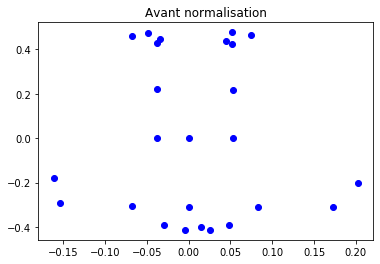

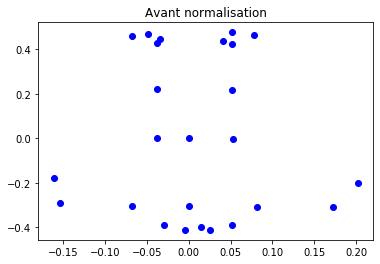

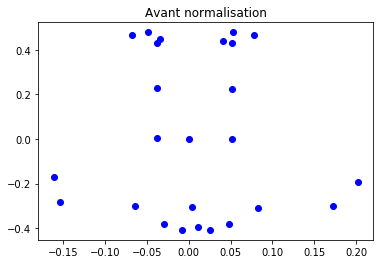

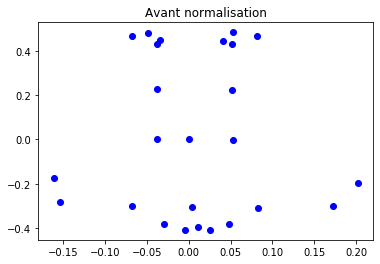

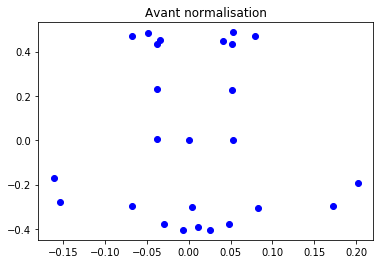

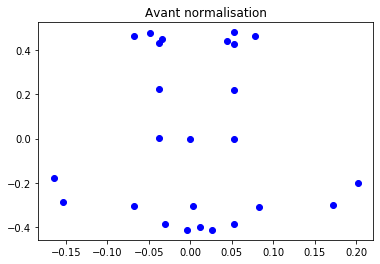

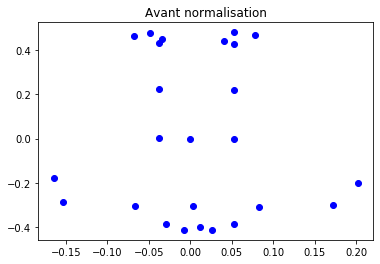

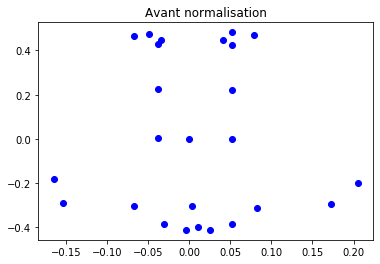

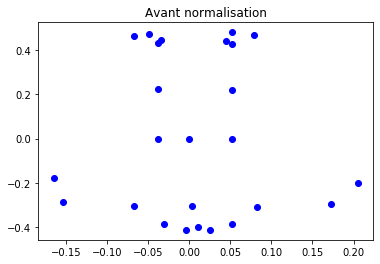

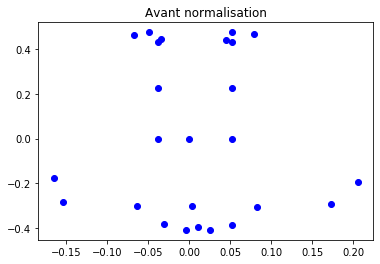

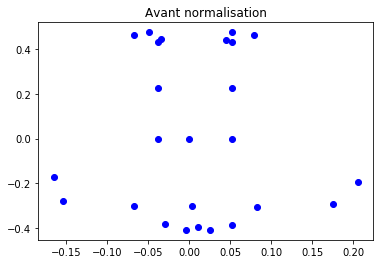

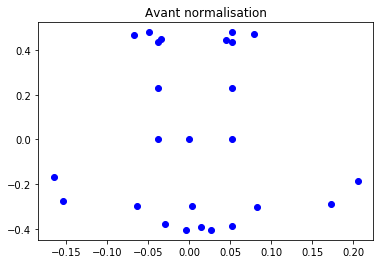

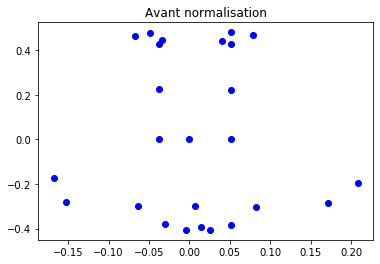

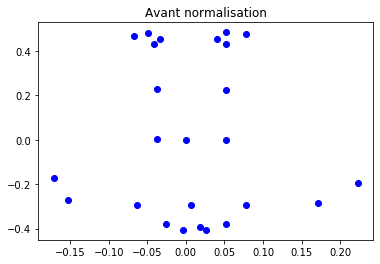

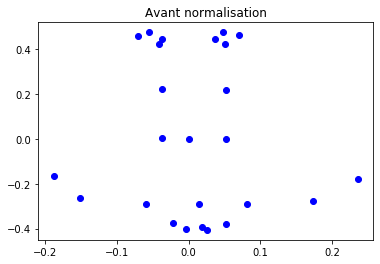

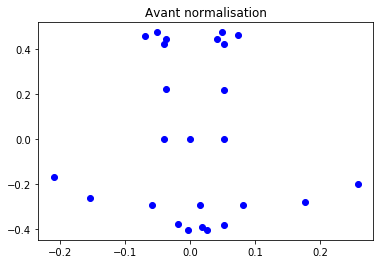

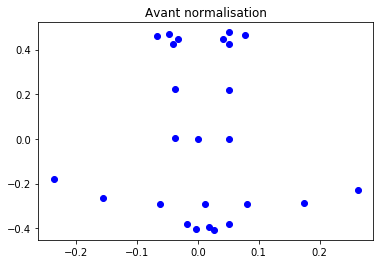

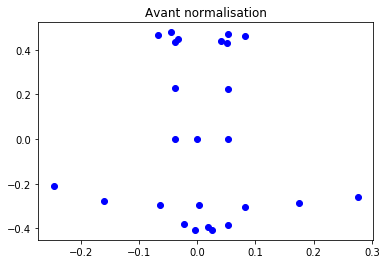

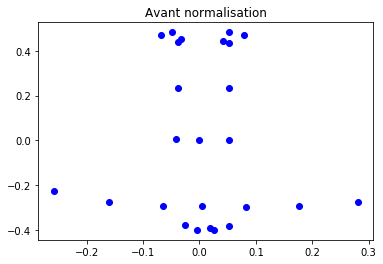

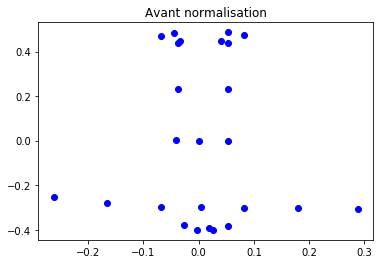

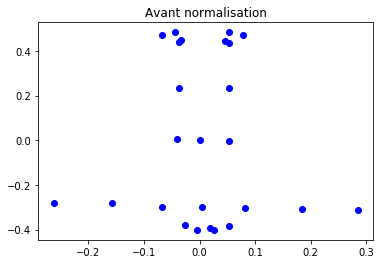

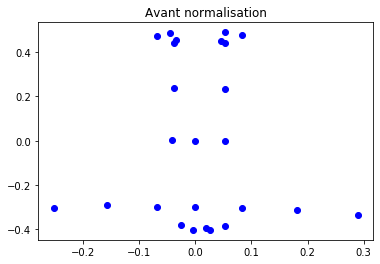

In [0]:
from matplotlib import pyplot as plt

def afficher_points(X_train): # affiche les 100 premières itérations du tenseur qui contient tout les tenseurs
  for t in range(2,100):
    x1 = X_train[0][0][t][:]
    y1 = X_train[0][1][t][:]
    plt.figure()
    plt.plot(x1, y1, 'bo')
    plt.title("Keypoints")

afficher_points(X_train)

Il faut normaliser les données

On récupère la taille max afin de pouvoir 'padder' les tenseurs

In [0]:
#savoir la largeur max d'une matrice
def search_max(X_train): # retourne le max pour le padding
  max = 0
  for x in X_train:
    m = x.shape[1]
    if m>=max:
      max = m
  print(max)
  return max

79


In [0]:
#normaliser la matrice et ajouter des 0 pour les matrices de tailles plus petite
def padding(X_train):
  max = search_max(X_train)
  X_test = []
  for x in standardize(X_train):
    print("x : ", x.shape)
    temp2 = np.zeros((2, max-x.shape[1], 25))
    print("temp2 : ", temp2.shape)
    temp4 = np.append(x, temp2, axis = 1)
    print("temp4 : ", temp4.shape)
    X_test.append(temp4)
  return X_test

X_test = padding(X_train)

Streaming output truncated to the last 5000 lines.
temp4 :  (2, 79, 25)
x :  (2, 19, 25)
temp2 :  (2, 60, 25)
temp4 :  (2, 79, 25)
x :  (2, 21, 25)
temp2 :  (2, 58, 25)
temp4 :  (2, 79, 25)
x :  (2, 14, 25)
temp2 :  (2, 65, 25)
temp4 :  (2, 79, 25)
x :  (2, 8, 25)
temp2 :  (2, 71, 25)
temp4 :  (2, 79, 25)
x :  (2, 13, 25)
temp2 :  (2, 66, 25)
temp4 :  (2, 79, 25)
x :  (2, 15, 25)
temp2 :  (2, 64, 25)
temp4 :  (2, 79, 25)
x :  (2, 14, 25)
temp2 :  (2, 65, 25)
temp4 :  (2, 79, 25)
x :  (2, 12, 25)
temp2 :  (2, 67, 25)
temp4 :  (2, 79, 25)
x :  (2, 12, 25)
temp2 :  (2, 67, 25)
temp4 :  (2, 79, 25)
x :  (2, 11, 25)
temp2 :  (2, 68, 25)
temp4 :  (2, 79, 25)
x :  (2, 11, 25)
temp2 :  (2, 68, 25)
temp4 :  (2, 79, 25)
x :  (2, 10, 25)
temp2 :  (2, 69, 25)
temp4 :  (2, 79, 25)
x :  (2, 9, 25)
temp2 :  (2, 70, 25)
temp4 :  (2, 79, 25)
x :  (2, 11, 25)
temp2 :  (2, 68, 25)
temp4 :  (2, 79, 25)
x :  (2, 11, 25)
temp2 :  (2, 68, 25)
temp4 :  (2, 79, 25)
x :  (2, 9, 25)
temp2 :  (2, 70, 25)
temp4 : 

In [0]:
#Charger les scores et les sauvgarder dans Y
import csv

def create_Y():
  Y = []
  with open("New.csv") as csv_file:
    csvReader = csv.reader(csv_file)
    for row in csvReader:
      Y.append(float(row[1])-5)
  Y = [i/40 for i in Y_train]
  return Y

Y = create_Y()

Normaliser les données Y

In [0]:
def change_shape(X_test):
  X_test=np.array(X_test)
  X=np.zeros((210,25,max,2))
  X_test.shape
  for i in range(210):
    Temp=X_test[i,:,:,:]
    for j in range(25):
      temp1=Temp[:,:,j]
      X[i,j,:,:]=np.transpose(temp1)
  return X

X = change_shape(X_test)



In [0]:
X.shape

(1680, 25, 79, 2)

Là on split les données

In [0]:
from sklearn.utils import shuffle

X, Y = shuffle(X, Y, random_state = 0)
X_test = X
x_train = np.array(X_test[0:140]) 
x_test = np.array(X_test[141:])
y_train = Y[0:140]
y_test = Y[141:]
X_test[0].shape

(25, 79, 2)

In [0]:
import keras
# calculer la taille d un output apres filtrage < output width=((W-F+2*P )/S)+1 >

max_size = max

input_size = (25,max,2)
model = keras.Sequential()

#initialiser le model avec une entrée un tenseur 3 dim
inp = keras.Input(shape=input_size) 
#première couche couche de convoluton
conv1 = keras.layers.Conv2D(38, (1,2), padding="same", activation="relu", input_shape = input_size) #par  défaut le pas S est 1 donc on mentionne pas
#normaliser les données
norm1 = keras.layers.BatchNormalization()
#max pooling ( prendre des matrices deux à deux et puis prendre le max)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None) #max pooling: il cree un caree 2D et ce deplace avec le long de la matrice et a chaque fois le output est le max élément de ce carrée

#première couche couche de convoluton mais avec plus de filtre
conv2 = keras.layers.Conv2D(76, (2,2), padding="same", activation="relu")
#normaliser les données
norm2 = keras.layers.BatchNormalization()
#max pooling ( prendre des matrices deux à deux et puis prendre le max)
pool2 = keras.layers.GlobalMaxPooling2D() #max pooling: il cree un caree 2D et ce deplace avec le long de la matrice et a chaque fois le output est le max élément de ce carrée


"""#première couche couche de convoluton mais avec plus de filtre
conv3 = keras.layers.Conv2D(152, (2,2), padding="same", activation="relu")
#normaliser les données
norm3 = keras.layers.BatchNormalization()
#max pooling ( prendre des matrices deux à deux et puis prendre le max)
pool3 = keras.layers.GlobalMaxPooling2D()

fc1 = keras.layers.Dense(50, activation='relu') 
#le output est unique et sera entre 0 1  et cela sera le score dont on a besoin
"""
fc2 = keras.layers.Dense(1, activation='linear') #sigmoid pour qu on a des sorties entre 0 et 1 

model.add(conv1)
model.add(norm1)
model.add(pool1)
model.add(conv2)
model.add(norm2)
model.add(pool2)

"""
model.add(conv3)
model.add(norm3)
model.add(pool3)
model.add(fc1)"""


model.add(fc2)

In [0]:
model.summary()
opt = keras.optimizers.Adam(lr=.00001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mse'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 79, 38)        190       
_________________________________________________________________
batch_normalization_5 (Batch (None, 25, 79, 38)        152       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 39, 38)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 39, 76)        11628     
_________________________________________________________________
batch_normalization_6 (Batch (None, 12, 39, 76)        304       
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 76)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [0]:
#entrainer le model et envoyer l'hisitorique  100 correspond au nombre d'entrainement
history = model.fit(x_train, y_train, epochs=10, batch_size=1,validation_data=(x_test, y_test))

Train on 1344 samples, validate on 335 samples
Epoch 1/10
1344/1344 [==============================] - 8s 6ms/step - loss: 16.8704 - mean_squared_error: 16.8704 - val_loss: 0.2603 - val_mean_squared_error: 0.2603
Epoch 2/10
1344/1344 [==============================] - 8s 6ms/step - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 3/10
1344/1344 [==============================] - 8s 6ms/step - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 4/10
1344/1344 [==============================] - 8s 6ms/step - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 5/10
1344/1344 [==============================] - 8s 6ms/step - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 6/10
1344/1344 [==============================] - 8s 6ms/step - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0902 

In [0]:
model.predict(x_test)

array([[0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],
       [0.6066716],


In [0]:
from matplotlib import pyplot as plt

def affiche(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
affiche(history)